In [1]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64
from scipy.stats import skew

from rd_zaokrouhleni import rd

In [2]:
display.display(display.Markdown(F"""{rd.__doc__}"""))


    Returns rounded string with defined precicion.

    INPUT:
    number: float, to be rounded
    precision: int, precision used whe rounding

    OUTPUT:
    round_str: str
    

In [3]:
bins = 11
x = np.linspace(-5, 5, 1000)
y = np.random.normal(size=len(x))
hist, bin_edges = np.histogram(y, density=True, bins = bins)
print(len(hist), len(bin_edges))

11 12


In [4]:
hist

array([0.01800536, 0.0450134 , 0.12243646, 0.28448472, 0.40332011,
       0.35650616, 0.30789169, 0.15844718, 0.06842038, 0.03060912,
       0.00540161])

In [5]:
bin_edges

array([-2.90371034, -2.34832022, -1.79293011, -1.23753999, -0.68214988,
       -0.12675976,  0.42863035,  0.98402047,  1.53941058,  2.0948007 ,
        2.65019082,  3.20558093])

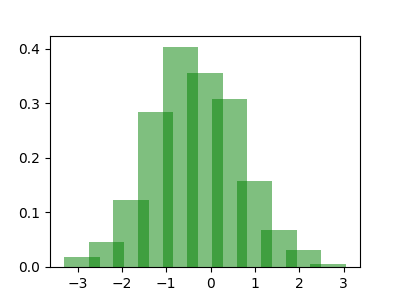

In [6]:
fig = plt.figure(figsize=(4, 3), facecolor='w')
#plt.hist(y, alpha = 0.5)
plt.bar(bin_edges[:bins], hist, color = "g", alpha = 0.5)
data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

In [7]:
# intervaly jsou stejně široké!
bin_width = (np.max(bin_edges) - np.min(bin_edges)) / len(hist)
print("Průměrný interval:", bin_width)
i = 0
while i < len(bin_edges):
    if i > 0:
        local_bin_width = bin_edges[i] - bin_edges[i-1]
        print (f"Interval {i}: ({rd(bin_edges[i-1], 3)}, {rd(bin_edges[i], 3)}), width = {rd(local_bin_width, 10)}.")
    i += 1

Průměrný interval: 0.5553901156361382
Interval 1: (-2.904, -2.348), width = 0.5553901156.
Interval 2: (-2.348, -1.793), width = 0.5553901156.
Interval 3: (-1.793, -1.238), width = 0.5553901156.
Interval 4: (-1.238, -0.682), width = 0.5553901156.
Interval 5: (-0.682, -0.127), width = 0.5553901156.
Interval 6: (-0.127, 0.429), width = 0.5553901156.
Interval 7: (0.429, 0.984), width = 0.5553901156.
Interval 8: (0.984, 1.539), width = 0.5553901156.
Interval 9: (1.539, 2.095), width = 0.5553901156.
Interval 10: (2.095, 2.650), width = 0.5553901156.
Interval 11: (2.650, 3.206), width = 0.5553901156.


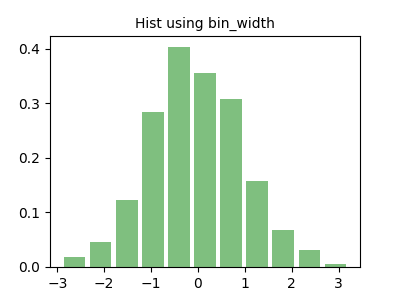

In [8]:
fig = plt.figure(figsize=(4, 3), facecolor='w')
#plt.hist(y, alpha = 0.5)
plt.bar(bin_edges[:bins]+bin_width/2, hist, color = "g", alpha = 0.5, width = bin_width-0.1)
plt.title("Hist using bin_width", fontsize=10)
data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

In [9]:
# super vychytávka
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

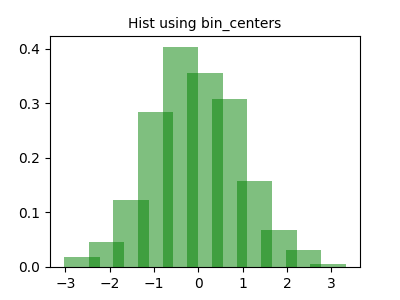

In [10]:
fig = plt.figure(figsize=(4, 3), facecolor='w')
#plt.hist(y, alpha = 0.5)
plt.bar(bin_centers, hist, color = "g", alpha = 0.5)
plt.title("Hist using bin_centers", fontsize=10)
data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

In [11]:
i = 0
while i < len(bin_edges):
    if i > 0:
        local_bin_width = bin_edges[i] - bin_edges[i-1]
        local_bin_center = bin_edges[i-1] + local_bin_width/2
        print (f"Interval {i}: ({rd(bin_edges[i-1], 3)}, {rd(bin_edges[i], 3)}), width = {rd(local_bin_width, 10)}, \
local_center = {rd(local_bin_center, 5)}, center = {rd(bin_centers[i-1], 5)}.")
    i += 1

Interval 1: (-2.904, -2.348), width = 0.5553901156, local_center = -2.62602, center = -2.62602.
Interval 2: (-2.348, -1.793), width = 0.5553901156, local_center = -2.07063, center = -2.07063.
Interval 3: (-1.793, -1.238), width = 0.5553901156, local_center = -1.51524, center = -1.51524.
Interval 4: (-1.238, -0.682), width = 0.5553901156, local_center = -0.95984, center = -0.95984.
Interval 5: (-0.682, -0.127), width = 0.5553901156, local_center = -0.40445, center = -0.40445.
Interval 6: (-0.127, 0.429), width = 0.5553901156, local_center = 0.15094, center = 0.15094.
Interval 7: (0.429, 0.984), width = 0.5553901156, local_center = 0.70633, center = 0.70633.
Interval 8: (0.984, 1.539), width = 0.5553901156, local_center = 1.26172, center = 1.26172.
Interval 9: (1.539, 2.095), width = 0.5553901156, local_center = 1.81711, center = 1.81711.
Interval 10: (2.095, 2.650), width = 0.5553901156, local_center = 2.37250, center = 2.37250.
Interval 11: (2.650, 3.206), width = 0.5553901156, local_c

In [12]:
(bin_edges[1:]+bin_width/2) - (bin_edges[:bins]+bin_width/2)

array([0.55539012, 0.55539012, 0.55539012, 0.55539012, 0.55539012,
       0.55539012, 0.55539012, 0.55539012, 0.55539012, 0.55539012,
       0.55539012])

In [13]:
#toto je blbost, dostanu o 1 interval míň
bin_centers[1:] - bin_centers[:-1]

array([0.55539012, 0.55539012, 0.55539012, 0.55539012, 0.55539012,
       0.55539012, 0.55539012, 0.55539012, 0.55539012, 0.55539012])

In [14]:
bin_centers+bin_width/2 - (bin_centers-bin_width/2)

array([0.55539012, 0.55539012, 0.55539012, 0.55539012, 0.55539012,
       0.55539012, 0.55539012, 0.55539012, 0.55539012, 0.55539012,
       0.55539012])

In [15]:
bin_centers*0+bin_width

array([0.55539012, 0.55539012, 0.55539012, 0.55539012, 0.55539012,
       0.55539012, 0.55539012, 0.55539012, 0.55539012, 0.55539012,
       0.55539012])

In [16]:
np.repeat(bin_width, bins)

array([0.55539012, 0.55539012, 0.55539012, 0.55539012, 0.55539012,
       0.55539012, 0.55539012, 0.55539012, 0.55539012, 0.55539012,
       0.55539012])

In [17]:
np.diff(bin_edges)

array([0.55539012, 0.55539012, 0.55539012, 0.55539012, 0.55539012,
       0.55539012, 0.55539012, 0.55539012, 0.55539012, 0.55539012,
       0.55539012])

In [18]:
# není 1!
np.sum(hist)

1.800536185010441

In [19]:
np.sum(hist * np.diff(bin_edges))

1.0

In [20]:
np.sum(hist * ((bin_edges[1:]+bin_width/2) - (bin_edges[:bins]+bin_width/2)))

1.0

In [21]:
np.sum(hist * np.repeat(bin_width, bins))

1.0

In [22]:
np.median(y)

-0.09317565094928809

In [23]:
np.mean(y)

-0.04675934580353147

In [24]:
np.std(y)

0.9880925936562004

In [25]:
np.var(y)

0.9763269736382371

In [26]:
np.sqrt(np.var(y))

0.9880925936562004

In [27]:
import math
math.sqrt(np.var(y))

0.9880925936562004

$$variance = \sigma^2$$
$$\sigma = \sqrt[2]{variance}$$
$$\begin{equation}
variance= \frac{\sum{(X-\mu)^2}}{N}
\end{equation}$$
$$\begin{equation}
\sigma = \sqrt\frac{\sum{(X-\mu)^2}}{N}
\end{equation}$$

In [28]:
ys = np.sort(y)

https://stackoverflow.com/questions/10138085/how-to-plot-normal-distribution

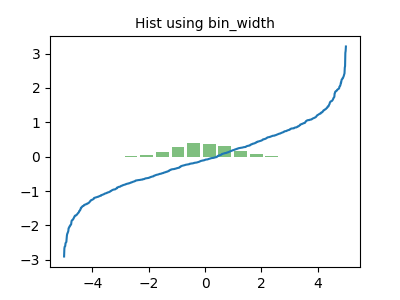

In [29]:
fig = plt.figure(figsize=(4, 3), facecolor='w')
#plt.hist(y, alpha = 0.5)
plt.bar(bin_edges[:bins]+bin_width/2, hist, color = "g", alpha = 0.5, width = bin_width-0.1)
plt.plot(x, ys)
plt.title("Hist using bin_width", fontsize=10)
data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

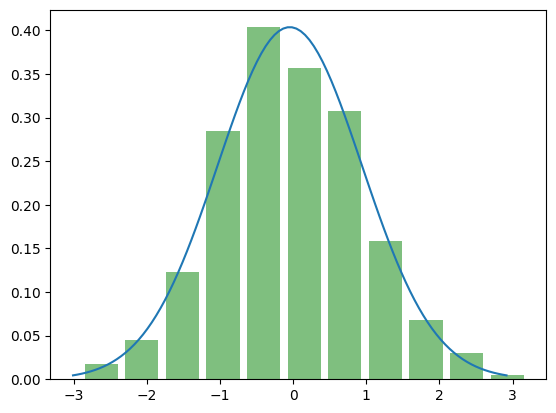

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = np.mean(y)
variance = np.var(y)
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.bar(bin_edges[:bins]+bin_width/2, hist, color = "g", alpha = 0.5, width = bin_width-0.1)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

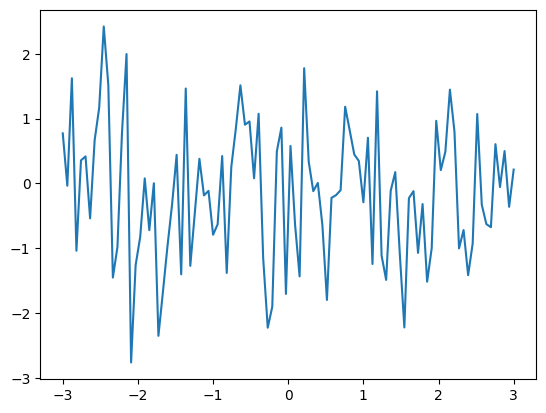

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, np.random.normal(mu, sigma, 100))
plt.show()

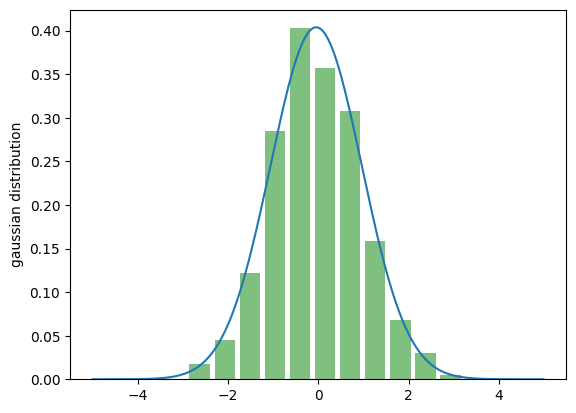

In [32]:
import numpy as np
import matplotlib.pyplot as plt

mean = np.mean(y);
std = np.std(y);
variance = np.square(std)
x = np.arange(-5,5,.01)
f = np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))

plt.plot(x,f)
plt.bar(bin_edges[:bins]+bin_width/2, hist, color = "g", alpha = 0.5, width = bin_width-0.1)
plt.ylabel('gaussian distribution')
plt.show()

In [33]:
# - is negative skewness, + is positive skewness
print(skew(y, axis=0, bias=True))

0.14162400386728058


In [34]:
alt = "Skewness"
image = "Skewness.webp"
display.display(display.Markdown(F"""![{alt}]({image})"""))

![Skewness](Skewness.webp)

In [35]:
display.display(display.Markdown("""

Positive and Negative Skewness
Positive skewness and negative skewness are two different ways that a dataset’s distribution can deviate from perfect symmetry (a normal distribution). They describe the direction of the skew or asymmetry in the data.

1. <b>Positive Skewness (Right Skew)</b>
In a positively skewed distribution, the tail on the right side (the larger values) is longer than the tail on the left side (the smaller values). This means that the majority of data points are concentrated on the left side of the distribution, and there are some extreme values on the right side. In the case of a positively skewed dataset,

Mean > Median > Mode

Examples of positively skewed data include income distribution (where most people earn a moderate income, but a few earn extremely high incomes), exam scores (where most students score in a certain range, but a few score exceptionally high), and stock market returns (where most days have modest returns, but a few days may have very high returns).


2. <b>Negative Skewness (Left Skew)</b>
In a negatively skewed distribution, the tail on the left side (the smaller values) is longer than the tail on the right side (the larger values). This implies that most of the data points are concentrated on the right side of the distribution, with a few extreme values on the left side. In the case of a negatively skewed dataset,

Mean < Median < Mode

Examples of negatively skewed data include test scores on an easy test (where most students score well, but a few score very low), the age at retirement (where most people retire at a certain age, but a few retire exceptionally early), and the gestational age at birth (where most babies are born full-term, but a few are born prematurely).
"""))



Positive and Negative Skewness
Positive skewness and negative skewness are two different ways that a dataset’s distribution can deviate from perfect symmetry (a normal distribution). They describe the direction of the skew or asymmetry in the data.

1. <b>Positive Skewness (Right Skew)</b>
In a positively skewed distribution, the tail on the right side (the larger values) is longer than the tail on the left side (the smaller values). This means that the majority of data points are concentrated on the left side of the distribution, and there are some extreme values on the right side. In the case of a positively skewed dataset,

Mean > Median > Mode

Examples of positively skewed data include income distribution (where most people earn a moderate income, but a few earn extremely high incomes), exam scores (where most students score in a certain range, but a few score exceptionally high), and stock market returns (where most days have modest returns, but a few days may have very high returns).


2. <b>Negative Skewness (Left Skew)</b>
In a negatively skewed distribution, the tail on the left side (the smaller values) is longer than the tail on the right side (the larger values). This implies that most of the data points are concentrated on the right side of the distribution, with a few extreme values on the left side. In the case of a negatively skewed dataset,

Mean < Median < Mode

Examples of negatively skewed data include test scores on an easy test (where most students score well, but a few score very low), the age at retirement (where most people retire at a certain age, but a few retire exceptionally early), and the gestational age at birth (where most babies are born full-term, but a few are born prematurely).


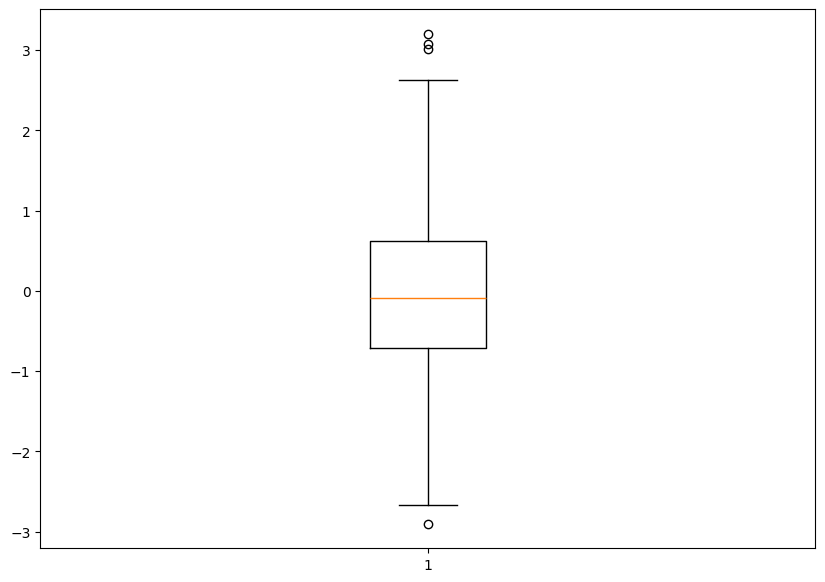

In [36]:
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(y)
# show plot
plt.show()

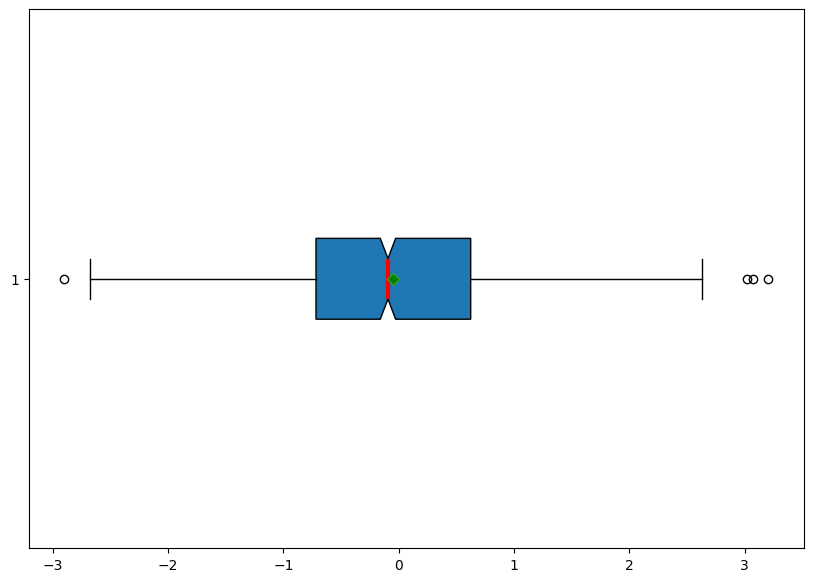

In [37]:
green_diamond = dict(markerfacecolor='g', marker='D')

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(y, patch_artist = True,
                notch ='True', vert = 0, showmeans = True) #, meanprops = green_diamond)
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

for mean in bp['means']:
    mean.set(color ='green',
               linewidth = 3, markerfacecolor='g', marker='D')

https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

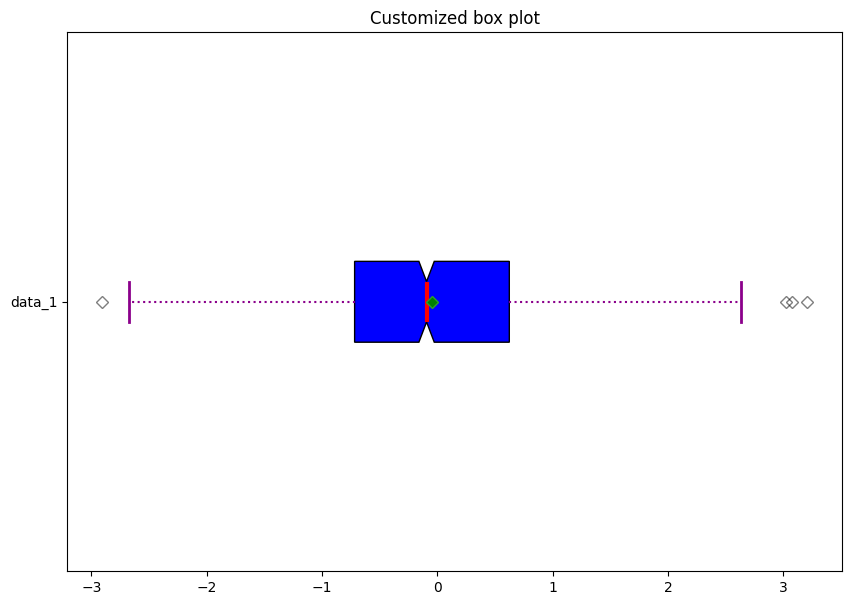

In [38]:
green_diamond = dict(markerfacecolor='g', marker='D')

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(y, patch_artist = True,
                notch ='True', vert = 0, showmeans = True) #, meanprops = green_diamond)
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

for mean in bp['means']:
    mean.set(color ='green',
               linewidth = 3, markerfacecolor='g', marker='D')

colors = ['#0000FF', '#00FF00', 
          '#FFFF00', '#FF00FF']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['data_1'])
 
# Adding title 
plt.title("Customized box plot")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

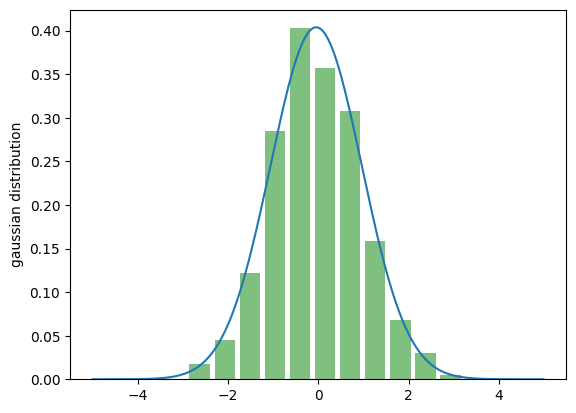

In [39]:
mean = np.mean(y);
std = np.std(y);
variance = np.square(std)
xf = np.arange(-5,5,.01)
f = np.exp(-np.square(xf-mean)/2*variance)/(np.sqrt(2*np.pi*variance))

plt.plot(x,f)
plt.bar(bin_edges[:-1]+bin_width/2, hist, color = "g", alpha = 0.5, width = bin_width-0.1)
plt.ylabel('gaussian distribution')
plt.show()

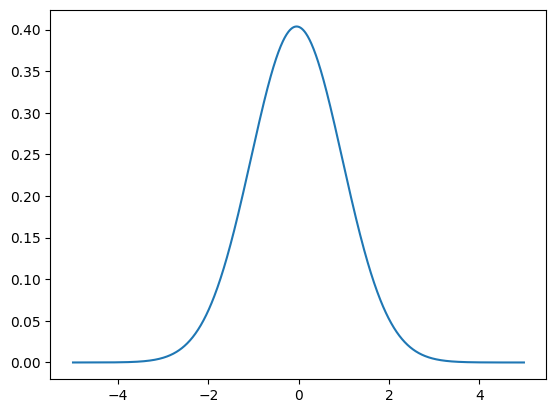

In [40]:
plt.plot(xf,f)
plt.show()

In [41]:
list(zip(x, y))

[(-5.0, 1.1314571393672848),
 (-4.99, 2.0366113345079424),
 (-4.98, -0.767443019967094),
 (-4.970000000000001, 0.2951236074203352),
 (-4.960000000000001, -0.5900084917443748),
 (-4.950000000000001, 0.20879029963235038),
 (-4.940000000000001, -0.5207612624599941),
 (-4.9300000000000015, 1.0952205990041655),
 (-4.920000000000002, -0.314184436332271),
 (-4.910000000000002, 1.2896485265021929),
 (-4.900000000000002, -1.6546506447909692),
 (-4.890000000000002, 2.1538181664739735),
 (-4.880000000000003, -0.35996289552726346),
 (-4.870000000000003, 0.9335023377617079),
 (-4.860000000000003, 0.07917822829873902),
 (-4.850000000000003, -0.15355649912277508),
 (-4.840000000000003, -0.8132888498532577),
 (-4.830000000000004, -0.6666393920380652),
 (-4.820000000000004, -0.631056407259065),
 (-4.810000000000004, -0.4349391031396271),
 (-4.800000000000004, -0.08090916365279363),
 (-4.7900000000000045, 0.21097456378230572),
 (-4.780000000000005, 0.30443236612202773),
 (-4.770000000000005, -0.93507828

In [42]:
y.sort()

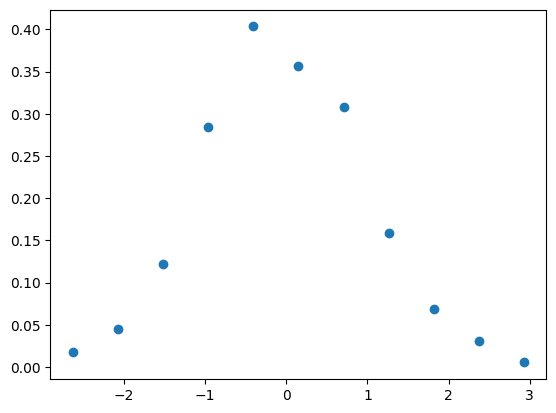

In [43]:
plt.scatter(bin_centers, hist)

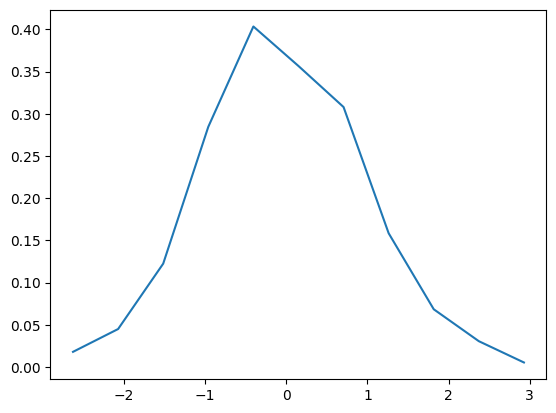

In [44]:
plt.plot(bin_centers, hist)